### UMAP for Data Integration

Here we will overlap graphs from single cell RNAseq and Proteomics data sets from the CITE-seq technology, and produce a consensus / integrative OMICs UMAP plot. The idea is to convert the two data types into graphs, i.e. non-parametric space where they forget their technological differences, and overlap the graphs. The resulting graph will be used for constructing the UMAP embeddings.

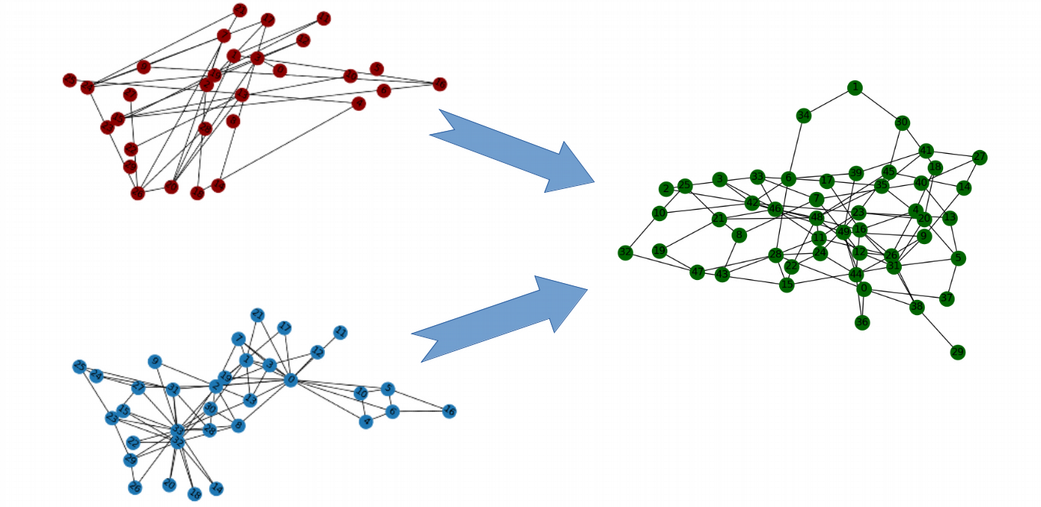

In [1]:
from IPython.display import Image
Image('/home/nikolay/Documents/Medium/UMAP_DataIntegration/UMAP_DataIntegration.png', width=2000)

We will start with reading and log-transforming the OMICs data.

In [2]:
import os
import numpy as np
import pandas as pd
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.utils import plot_model
from keras.layers import Input, Dense
from keras.layers.merge import concatenate

os.chdir('/home/nikolay/WABI/Misc/SingleCell/CITEseq/')

scRNAseq = pd.read_csv('scRNAseq.txt',sep='\t')
scProteomics = pd.read_csv('scProteomics.txt',sep='\t')

X_scRNAseq = scRNAseq.values[:,0:(scRNAseq.shape[1]-1)]
Y_scRNAseq = scRNAseq.values[:,scRNAseq.shape[1]-1]
X_scProteomics = scProteomics.values[:,0:(scProteomics.shape[1]-1)]
Y_scProteomics = scProteomics.values[:,scProteomics.shape[1]-1]

X_scRNAseq = np.log(X_scRNAseq + 1)
X_scProteomics = np.log(X_scProteomics + 1)

Using TensorFlow backend.


In [3]:
X_scRNAseq.shape

(8617, 976)

In [4]:
X_scProteomics.shape

(8617, 10)

Let us display the UMAP embeddings of individual OMICs data sets. We will start with the scRNAseq dataset. As an optimal number of nearest neighbors we will choose sqrt(N) = sqrt(8617) = 93.

UMAP(init=array([[45.31235894,  0.07477159],
       [46.53271754,  1.71486063],
       [46.8638235 ,  0.98846408],
       ...,
       [ 1.11426643, -1.86512337],
       [ 4.54796886, -0.69171758],
       [ 2.61794017, -0.97065852]]),
     min_dist=1, n_epochs=1000, n_neighbors=93, verbose=2)
Construct fuzzy simplicial set
Tue Sep 29 20:27:30 2020 Finding Nearest Neighbors
Tue Sep 29 20:27:30 2020 Building RP forest with 10 trees
Tue Sep 29 20:27:31 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
Tue Sep 29 20:27:44 2020 Finished Nearest Neighbor Search
Tue Sep 29 20:27:47 2020 Construct embedding
	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Tue Sep 29 20:28:21 2020 Finished embedding


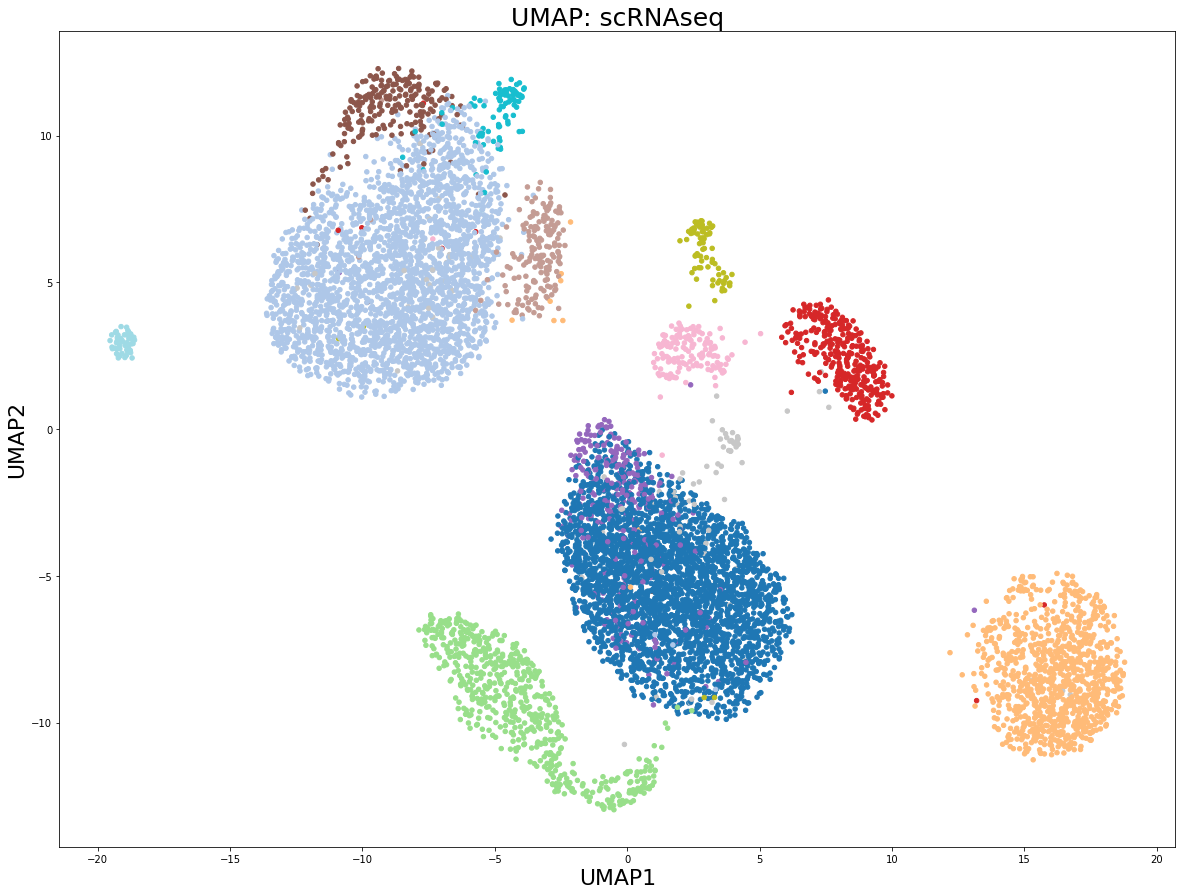

In [5]:
import warnings
warnings.filterwarnings("ignore")

from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 20).fit_transform(X_scRNAseq)
model = UMAP(n_components = 2, min_dist = 1, n_neighbors = 93, init = X_reduced[:, 0:2], n_epochs = 1000, 
             verbose = 2)
umap = model.fit_transform(X_reduced)

plt.figure(figsize = (20,15))
plt.scatter(umap[:, 0], umap[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 20)
plt.title('UMAP: scRNAseq', fontsize = 25); 
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)
plt.show()

Now let us display UMAP embeddings for the scProteomics dataset of the CITE-seq sequencing technology.

UMAP(init=array([[-1.65366402, -0.2564025 ],
       [-1.7084814 ,  1.69115812],
       [-1.03060202, -0.13172222],
       ...,
       [-2.19859839, -5.16795233],
       [-2.10143214, -2.48594223],
       [-2.43134931, -3.33697131]]),
     min_dist=0.8, n_epochs=1000, n_neighbors=93, verbose=2)
Construct fuzzy simplicial set
Tue Sep 29 20:32:11 2020 Finding Nearest Neighbors
Tue Sep 29 20:32:11 2020 Building RP forest with 10 trees
Tue Sep 29 20:32:11 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
Tue Sep 29 20:32:17 2020 Finished Nearest Neighbor Search
Tue Sep 29 20:32:18 2020 Construct embedding
	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Tue Sep 29 20:32:52 2020 Finished embedding


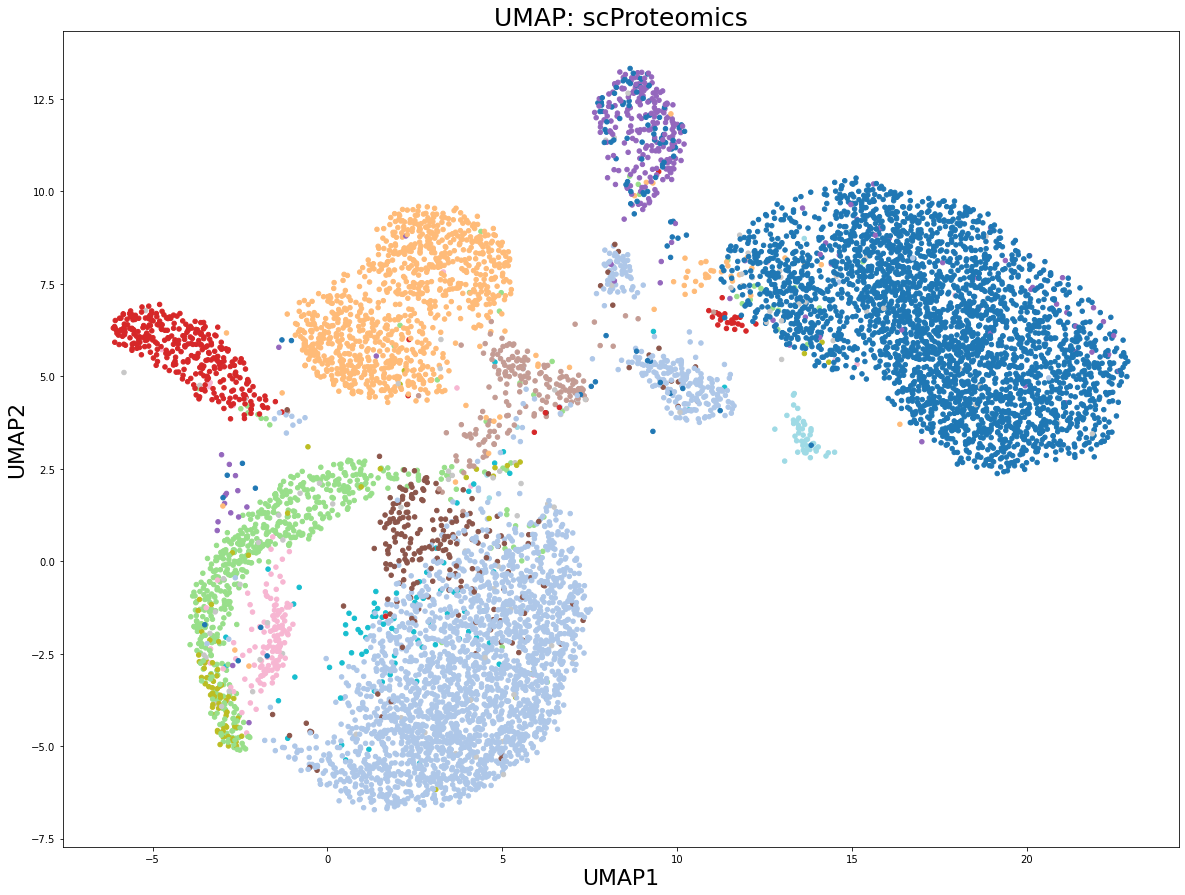

In [9]:
import warnings
warnings.filterwarnings("ignore")

from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 10).fit_transform(X_scProteomics)
model = UMAP(n_components = 2, min_dist = 0.8, n_neighbors = 93, init = X_reduced[:, 0:2], n_epochs = 1000, 
             verbose = 2)
umap = model.fit_transform(X_reduced)

plt.figure(figsize = (20,15))
plt.scatter(umap[:, 0], umap[:, 1], c = Y_scProteomics, cmap = 'tab20', s = 20)
plt.title('UMAP: scProteomics', fontsize = 25); 
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)
plt.show()

Now we will construct the intersection of the two graphs / simplicial sets, and visualize the resulting embeddings.

In [16]:
import umap

X_reduced_scRNAseq = PCA(n_components = 20).fit_transform(X_scRNAseq)
X_reduced_scProteomics = PCA(n_components = 10).fit_transform(X_scProteomics)

fit1 = umap.UMAP(n_components = 2, min_dist = 1, n_neighbors = 93, n_epochs = 1000, 
                 init = X_reduced_scRNAseq[:, 0:2], verbose = 2).fit(X_reduced_scRNAseq)
fit2 = umap.UMAP(n_components = 2, min_dist = 0.8, n_neighbors = 93, n_epochs = 1000, 
                 init = X_reduced_scProteomics[:, 0:2], verbose = 2).fit(X_reduced_scProteomics)
intersection = umap.umap_. general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight = 0.45)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1.learning_rate, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                1000, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)

UMAP(init=array([[45.31235894,  0.07477159],
       [46.53271754,  1.71486063],
       [46.8638235 ,  0.98846408],
       ...,
       [ 1.11426643, -1.86512337],
       [ 4.54796886, -0.69171758],
       [ 2.61794017, -0.97065852]]),
     min_dist=1, n_epochs=1000, n_neighbors=93, verbose=2)
Construct fuzzy simplicial set
Tue Sep 29 20:41:09 2020 Finding Nearest Neighbors
Tue Sep 29 20:41:09 2020 Building RP forest with 10 trees
Tue Sep 29 20:41:09 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
Tue Sep 29 20:41:16 2020 Finished Nearest Neighbor Search
Tue Sep 29 20:41:17 2020 Construct embedding
	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Tue Sep 29 20:41:52 2020 Finished embedding
UMAP(init=array

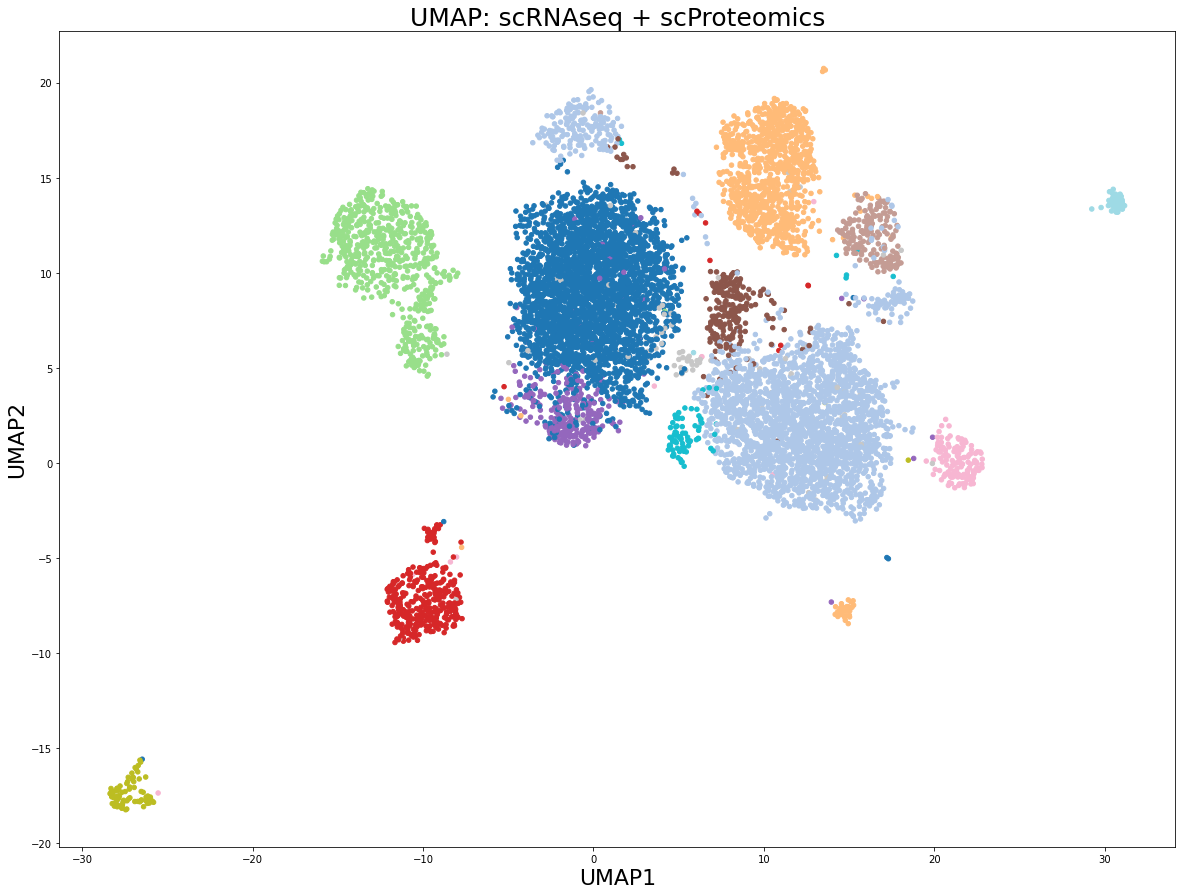

In [17]:
plt.figure(figsize = (20,15))
plt.scatter(embedding[:, 0], embedding[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 20)
plt.title('UMAP: scRNAseq + scProteomics', fontsize = 25); 
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)
plt.show()